In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [4]:
if df.empty:
    print("Nuk ka te dhena per kete periudhe.")
    exit()

In [5]:
df['Date'] = pd.to_datetime(df.index)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [6]:
features = ['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']
X = df[features]
y = df['Close']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\Pulse Electronics\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1.3349916207695058
R^2 Score: 0.9996924785580739


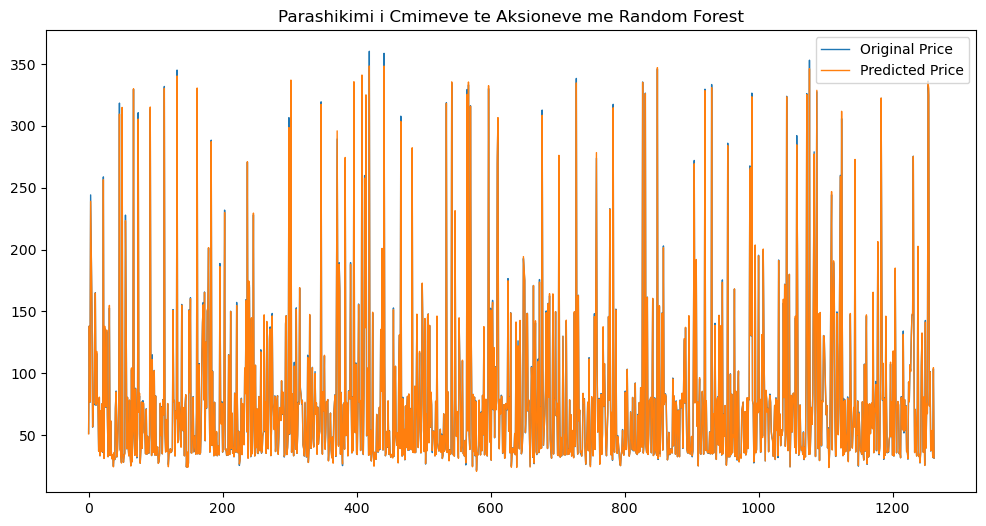

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Original Price', linewidth=1)
plt.plot(y_pred, label='Predicted Price', linewidth=1)
plt.title('Parashikimi i Cmimeve te Aksioneve me Random Forest')
plt.legend()
plt.show()

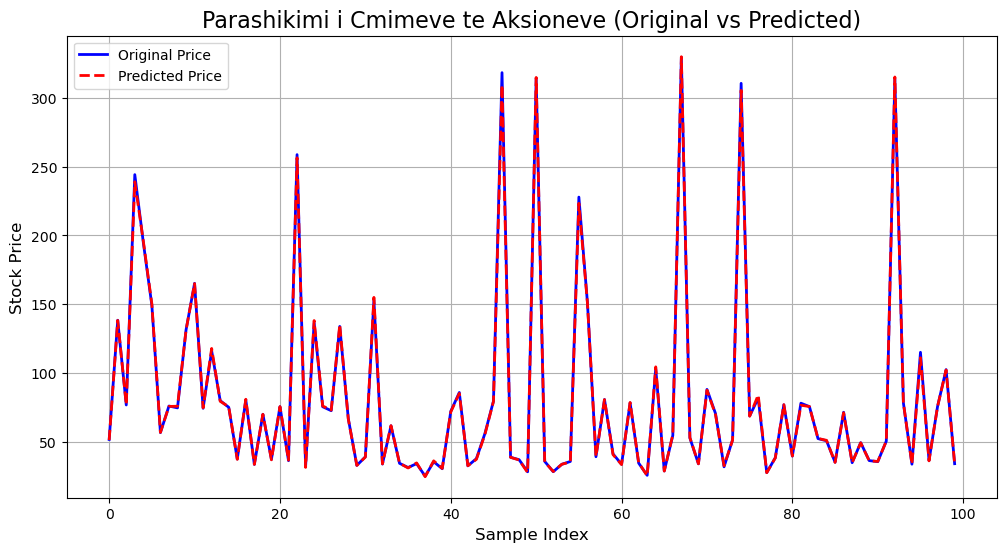

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(y_test.values[:100], label='Original Price', color='blue', linewidth=2)

plt.plot(y_pred[:100], label='Predicted Price', color='red', linestyle='--', linewidth=2)

plt.title('Parashikimi i Cmimeve te Aksioneve (Original vs Predicted)', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
